In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# next line of code sets the graph style to a seaborn style
sns.set()

cl = pd.read_csv('NCDB_1999_to_2017.csv',  na_values=['UU', 'XX', 'U', 'X', 'UUUU'])
cl.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,06,1990,01,M,41,11,1,NaN,1.0,752
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,01,1987,01,M,19,11,1,NaN,1.0,752
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,01,1987,02,F,20,13,2,02,2.0,752
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,01,1986,01,M,46,11,1,NaN,1.0,753
4,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,NN,NNNN,01,M,05,99,2,NaN,3.0,753


In [2]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_ID    float64
 13  V_TYPE  object 
 14  V_YEAR  object 
 15  P_ID    object 
 16  P_SEX   object 
 17  P_AGE   object 
 18  P_PSN   object 
 19  P_ISEV  object 
 20  P_SAFE  object 
 21  P_USER  float64
 22  C_CASE  int64  
dtypes: float64(6), int64(3), object(14)
memory usage: 1.2+ GB


In [3]:
cl.V_ID.unique()

array([ 1.,  2., 99.,  3.,  4., nan,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
       64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 83., 85.,
       86., 75., 76., 77.])

## Driver and not a parked car

In [4]:
print(cl.C_CASE.count())
print(cl.C_CASE.nunique())
print(cl[(cl.P_PSN == '11') & (cl.C_CONF != '41')].isnull().sum())



6772563
2570235
C_YEAR         0
C_MNTH       229
C_WDAY       920
C_HOUR     44230
C_SEV          0
C_VEHS       356
C_CONF    150214
C_RCFG    365129
C_WTHR     63897
C_RSUR     57214
C_RALN    305771
C_TRAF    177401
V_ID          80
V_TYPE     29849
V_YEAR    289818
P_ID          12
P_SEX     162289
P_AGE     199223
P_PSN          0
P_ISEV     30895
P_SAFE    494163
P_USER     73002
C_CASE         0
dtype: int64


In [5]:
print(cl[(cl.P_PSN == '11') & (cl.C_WDAY.isnull() == False)
        & (cl.C_HOUR.isnull() == False) & (cl.C_VEHS.isnull() == False)
        & (cl.C_CONF.isnull() == False) & (cl.C_CONF != 'QQ')
        & (cl.C_RCFG.isnull() == False) & (cl.C_RCFG != 'QQ')
        & (cl.C_WTHR.isnull() == False) & (cl.C_WTHR != 'Q')
        & (cl.C_RSUR.isnull() == False) & (cl.C_RSUR != 'Q')
        & (cl.V_TYPE.isnull() == False) & (cl.V_TYPE != 'QQ') & (cl.V_TYPE != 'NN')
        & (cl.P_SEX.isnull() == False) & (cl.P_SEX!='N')
        & (cl.P_AGE.isnull() == False) & (cl.P_AGE!='NN')
        ].groupby('C_YEAR').C_CASE.agg('count'))

C_YEAR
1999    204014
2000    207504
2001    200613
2002    205959
2003    202081
2004    194809
2005    194022
2006    186969
2007    183407
2008    168417
2009    164705
2010    162130
2011    155379
2012    162355
2013    161195
2014    152356
2015    161623
2016    159699
2017    154607
Name: C_CASE, dtype: int64


# Dealing with nulls

## Just replace month with random and changed the type to int
## remove rows with null or unknown values for a subset of columns
### We look at C_RALN,  C_TARF and V_YEAR separately. The other columns will be ignored.

In [6]:
print(cl.C_MNTH.isnull().sum())
print(cl.C_WDAY.isnull().sum())
print(cl.C_HOUR.isnull().sum())
print(cl.shape[0])

cl.C_MNTH = cl.C_MNTH.fillna(pd.Series(np.random.randint(1, 12, cl.C_MNTH.shape)))
cl.C_MNTH = cl.C_MNTH.astype(np.int64)

clsb1 = cl[(cl.P_PSN == '11') & (cl.C_WDAY.isnull() == False)
        & (cl.C_HOUR.isnull() == False) & (cl.C_VEHS.isnull() == False)
        & (cl.C_CONF.isnull() == False) & (cl.C_CONF != 'QQ')
        & (cl.C_RCFG.isnull() == False) & (cl.C_RCFG != 'QQ')
        & (cl.C_WTHR.isnull() == False) & (cl.C_WTHR != 'Q')
        & (cl.C_RSUR.isnull() == False) & (cl.C_RSUR != 'Q')
        & (cl.V_TYPE.isnull() == False) & (cl.V_TYPE != 'QQ') & (cl.V_TYPE != 'NN')
        & (cl.P_SEX.isnull() == False) & (cl.P_SEX!='N')
        & (cl.P_AGE.isnull() == False) & (cl.P_AGE!='NN')]

clsb1.isnull().sum()

425
1364
66337
6772563


C_YEAR         0
C_MNTH         0
C_WDAY         0
C_HOUR         0
C_SEV          0
C_VEHS         0
C_CONF         0
C_RCFG         0
C_WTHR         0
C_RSUR         0
C_RALN     30295
C_TRAF     68402
V_ID           0
V_TYPE         0
V_YEAR    101670
P_ID           8
P_SEX          0
P_AGE          0
P_PSN          0
P_ISEV     14380
P_SAFE    273428
P_USER     11198
C_CASE         0
dtype: int64

## Number of accidents per year

### Plot 01

# Accidents are declined over the years 
## Our sample data kept a fair proportion of data for each year 

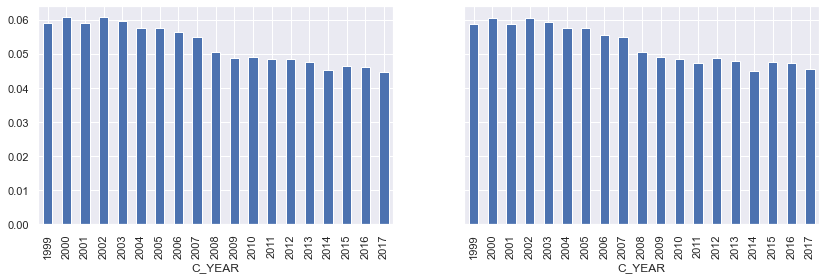

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 4))  
df = cl.groupby('C_YEAR').C_CASE.nunique()/cl.C_CASE.nunique()
df.plot(kind='bar', ax=ax1)
df = clsb1.groupby('C_YEAR').C_CASE.nunique()/clsb1.C_CASE.nunique()
df.plot(kind='bar', ax=ax2)

## Age: Create Age Boxes

In [8]:
clsb1.P_AGE = clsb1.P_AGE.astype(np.int64)

# create age boxes

bin = [1, 16, 36, 55, 76, 99]
bin_labels = ['<16', '16-36', '36-56', '56-76', '>76']
clsb1['AgeBox'] = pd.cut(clsb1['P_AGE'], bin, right = False, labels = bin_labels);
clsb1[['P_AGE', 'AgeBox']]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-8-d14538ad063d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clsb1['AgeBox'] = pd.cut(clsb1['P_AGE'], bin, right = False, labels = bin_labels);


,P_AGE,AgeBox
52,33,16-36
54,70,56-76
125,38,36-56
139,55,56-76
141,34,16-36
...,...,...
6772527,27,16-36
6772529,23,16-36
6772533,17,16-36
6772534,19,16-36


### Plot 2

# Comparing drivers by age and gender

[Text(0, 0, '<16'),
 Text(0, 0, '16-36'),
 Text(0, 0, '36-56'),
 Text(0, 0, '56-76'),
 Text(0, 0, '>76')]

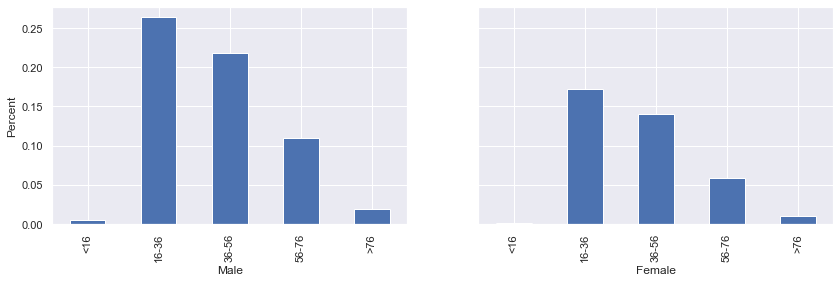

In [9]:
#ax = sns.barplot(x="x", y="x", data=cl_age, estimator=lambda AgeBox: len(AgeBox) / len(cl_age) * 100)
#ax.set(ylabel="Percent")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 4))  
plt.xlabel = 'Male'

df = clsb1[(clsb1.P_SEX=='M')].groupby(['AgeBox']).agg({'C_CASE': 'count'})/clsb1.agg({'C_CASE': 'count'})
df.unstack().plot(kind='bar', ax = ax1 )
ax1.set(ylabel="Percent", xlabel="Male")
ax1.set_xticklabels(bin_labels)

df = clsb1[(clsb1.P_SEX=='F')].groupby(['AgeBox']).agg({'C_CASE': 'count'})/clsb1.agg({'C_CASE': 'count'})
df.unstack().plot(kind='bar', ax = ax2)
ax2.set(xlabel="Female")
ax2.set_xticklabels(bin_labels)



### Plot 3

# There is an outliner in V_Type, in this study we just focus on V_Type = 01
## Light Duty Vehicle 

[Text(0.5, 0, 'Vehicle Type')]

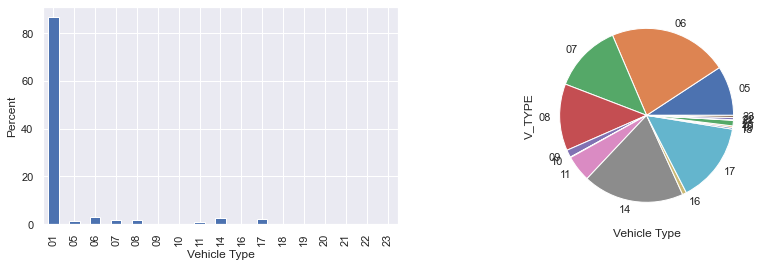

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 4))  
plt.grid(b=True, which='major', color='#666666', linestyle='-')

clsb1.V_TYPE.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar', ax = ax1)
ax1.set(ylabel="Percent", xlabel="Vehicle Type")
clsb1[clsb1.V_TYPE!='01'].V_TYPE.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='pie', ax = ax2)
ax2.set(xlabel="Vehicle Type")

### Plot 4

# most of the collisions are in C_RCFG = 02
# Roadway configuration: At an intersection of at least two public roadways

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Roadway configuration')]

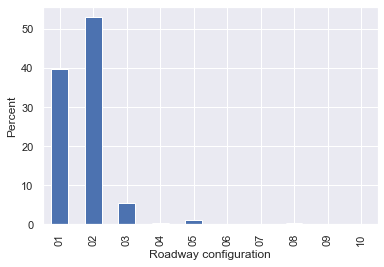

In [15]:

ax = clsb1.C_RCFG.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar')
ax.set(ylabel="Percent", xlabel="Roadway configuration")

### Plot 5

# Most of the collisions are in C_CONF = 21 rear-end collision

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Collision configuration')]

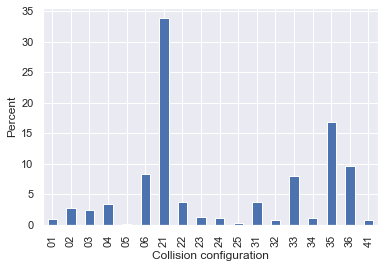

In [16]:

ax = clsb1.C_CONF.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar')
ax.set(ylabel="Percent", xlabel="Collision configuration")

### Plot 6

## Most of the accident happend during June-Oct ! Good weather?!
## Between 15:00 - 17:00

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Week Day')]

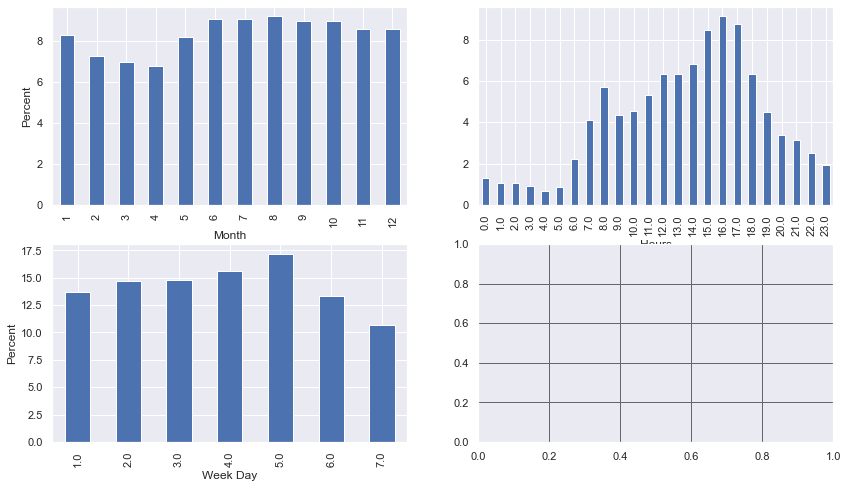

In [17]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(14, 8))  
plt.grid(b=True, which='major', color='#666666', linestyle='-')

clsb1.C_MNTH.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar', ax=ax1)
ax1.set(ylabel="Percent", xlabel="Month")
clsb1.C_HOUR.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar', ax=ax2)
ax2.set(xlabel="Hours")
clsb1.C_WDAY.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar', ax=ax3)
ax3.set(ylabel="Percent", xlabel="Week Day")


### Plot 7

## Weather clear and sunny
## Road surface Dry and Normal

[Text(0.5, 0, 'Road surface')]

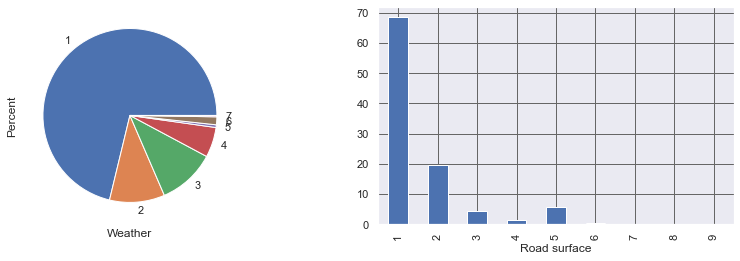

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 4))  
plt.grid(b=True, which='major', color='#666666', linestyle='-')

clsb1.C_WTHR.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='pie', ax=ax1)
ax1.set(ylabel="Percent", xlabel="Weather")
clsb1.C_RSUR.value_counts(normalize=True).mul(100).round(2).sort_index().plot(kind='bar', ax=ax2)
ax2.set(xlabel="Road surface")



# Correlations

### Plot 8

## Weather and Surface

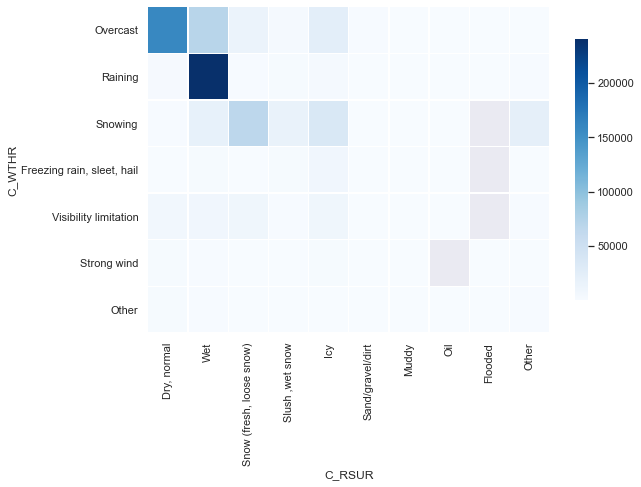

In [69]:
df = cl[cl.C_WTHR!='1'].groupby(['C_WTHR', 'C_RSUR']).C_CASE.nunique().unstack()

fig, ax = plt.subplots(figsize=(9, 6))
# plot heatmap
sns.heatmap(df, cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})

xticks_labels = ['Dry, normal', 'Wet','Snow (fresh, loose snow)','Slush ,wet snow', 'Icy','Sand/gravel/dirt','Muddy','Oil','Flooded','Other']
yticks_labels = ['Overcast','Raining','Snowing','Freezing rain, sleet, hail', 'Visibility limitation','Strong wind','Other']

plt.xticks(np.arange(10) + .5, labels=xticks_labels, rotation='vertical' )
plt.yticks(np.arange(7) + .5, labels=yticks_labels, rotation='horizontal')
plt.show()


### Plot 9

## Weather and Number of Vehicles

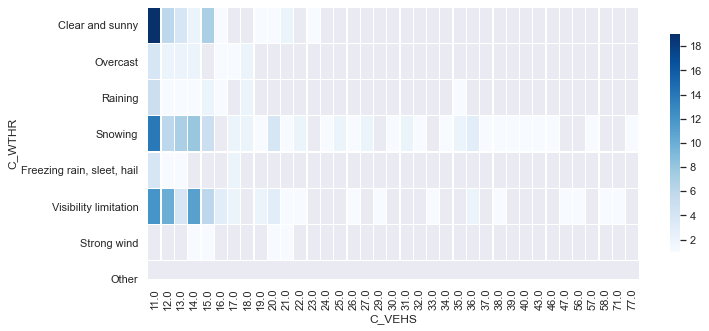

In [78]:
df = clsb1[clsb1.C_VEHS>10].groupby(['C_WTHR', 'C_VEHS']).C_CASE.nunique().unstack()

fig, ax = plt.subplots(figsize=(11, 5))
# plot heatmap
sns.heatmap(df, cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})

yticks_labels = ['Clear and sunny','Overcast','Raining','Snowing','Freezing rain, sleet, hail', 'Visibility limitation','Strong wind','Other']


plt.yticks(np.arange(8) + .5, labels=yticks_labels, rotation='horizontal')
plt.show()


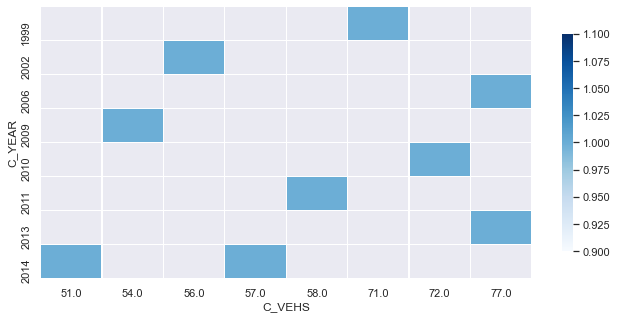

In [93]:
df = cl[cl.C_VEHS>50].groupby(['C_YEAR', 'C_VEHS']).C_CASE.nunique().unstack()

fig, ax = plt.subplots(figsize=(11, 5))
# plot heatmap
sns.heatmap(df, cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})

#yticks_labels = ['Clear and sunny','Overcast','Raining','Snowing','Freezing rain, sleet, hail', 'Visibility limitation','Strong wind','Other']


#plt.yticks(np.arange(8) + .5, labels=yticks_labels, rotation='horizontal')
plt.show()

In [3]:

#cl.C_CONF = cl.C_CONF.replace('QQ', '100').astype(np.float64)
#cl.C_RCFG = cl.C_RCFG.replace('QQ', '100').astype(np.float64)
#cl.C_WTHR = cl.C_WTHR.replace('Q', '100').astype(np.float64)
#cl.C_RSUR = cl.C_RSUR.replace('Q', '100').astype(np.float64)
#cl.C_RALN = cl.C_RALN.replace('Q', '100').astype(np.float64)
#cl.C_TRAF = cl.C_TRAF.replace('QQ', '100').astype(np.float64)
#cl.V_TYPE = cl.V_TYPE.replace('QQ', '100').replace('NN', '0').astype(np.float64)
#cl.V_YEAR = cl.V_YEAR.replace('NNNN', '0').replace('UUUU', np.nan).astype(np.float64)
#cl.P_ID = cl.P_ID.replace('NN','0').astype(np.float64)
#cl.P_SEX = cl.P_SEX.replace('N','0').replace('M', '1').replace('F','2').astype(np.float64)
#cl.P_AGE = cl.P_AGE.replace('NN','0').astype(np.float64)
#cl.P_PSN = cl.P_PSN.replace('NN','0').replace('QQ','100').astype(np.float64)
#cl.P_ISEV = cl.P_ISEV.replace('N','0').astype(np.float64)
#cl.P_SAFE = cl.P_SAFE.replace('NN','0').replace('QQ','100').astype(np.float64)


In [217]:
print(cl.V_TYPE.isnull().sum())
print(cl.V_TYPE.unique())

print(cl_age.V_TYPE.isnull().sum())
print(cl_age.V_TYPE.unique())

cl_vtype = cl[(cl.P_AGE!='NN')&(cl.P_AGE.isnull()==0)]
#cl_age.P_AGE = cl_age.P_AGE.astype(np.int64)
#cl_age.P_AGE.dtype
#cl_age.P_AGE.describe()



35332
['06' '01' 'NN' '11' nan '20' '17' '07' '08' 'QQ' '09' '22' '14' '23' '05'
 '16' '19' '18' '10' '21']
12990
['06' '01' 'NN' '11' nan '20' '07' '17' '08' 'QQ' '09' '22' '14' '23' '05'
 '16' '19' '18' '10' '21']


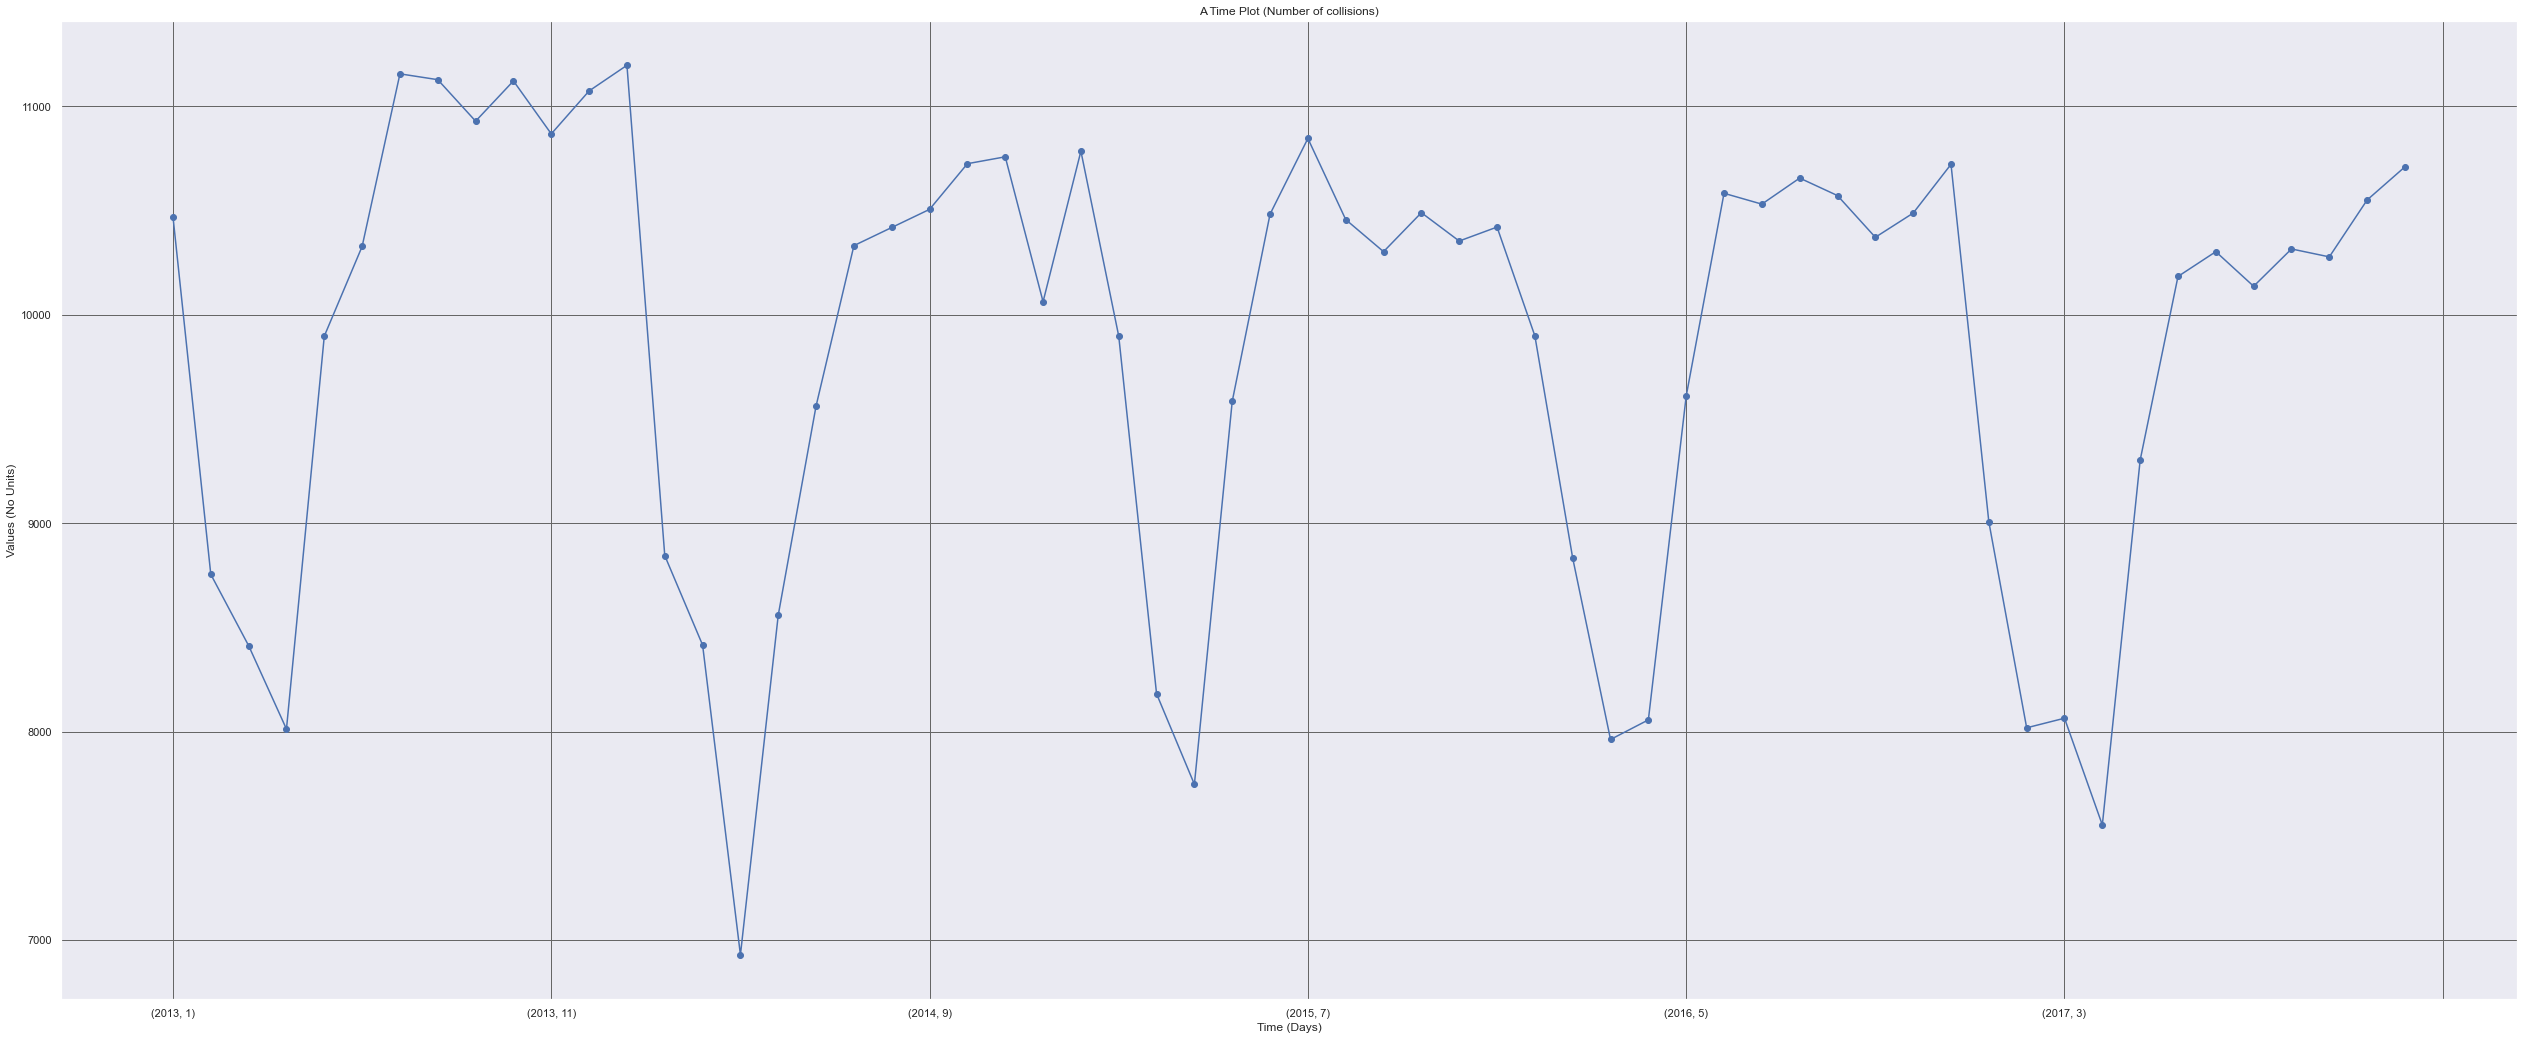

In [19]:
f, ax1 = plt.subplots(1, 1,figsize=(44, 18))  
plt.grid(b=True, which='major', color='#666666', linestyle='-')

clt = cl[(cl.C_YEAR >= 2013) &  (cl.C_YEAR < 2018)].groupby(['C_YEAR', 'C_MNTH']).C_CASE.nunique()

aTimePlot = clt.plot(style="-o", title="A Time Plot (Number of collisions)", ax = ax1)
aTimePlot.set_ylabel("Values (No Units)")
aTimePlot.set_xlabel("Time (Days)")
tmp = aTimePlot.plot()




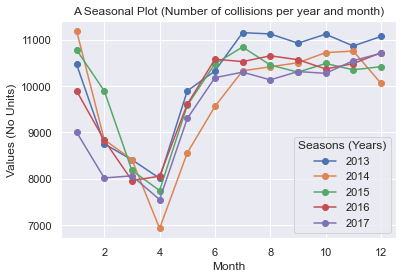

In [20]:
cltf = clt.to_frame(name="value").reset_index() 
aSeasonalFrame = cltf.pivot_table(values="value",
                       aggfunc='sum',
                       index=cltf.C_MNTH, # index for units (could be aggregates)
                       columns=cltf.C_YEAR # index for creating seasons
                      )
aSeasonalFrame.columns.name = 'Seasons (Years)'
aSeasonalPlot = aSeasonalFrame.plot(style="-o",
                                    title="A Seasonal Plot (Number of collisions per year and month)")
aSeasonalPlot.set_ylabel("Values (No Units)")
aSeasonalPlot.set_xlabel("Month")
tmp = aSeasonalPlot.plot()

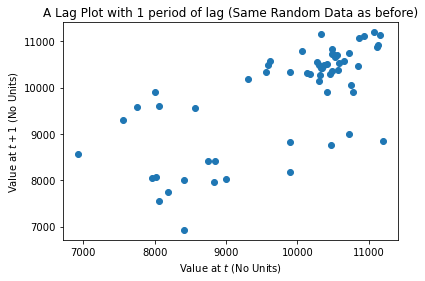

In [129]:
# pandas has a shorthand notation for constructing this type of plot.
aLagPlot = pd.plotting.lag_plot(series=clt, lag=1)
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 1 period of lag (Same Random Data as before)")
None